<a href="https://colab.research.google.com/github/cardstud/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/module3-introduction-to-bayesian-inference/LS_DS_133_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 133

## Introduction to Bayesian Inference




## Assignment - Code it up!

Most of the above was pure math - now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up, and as a stretch goal - refactor your code into helpful reusable functions!

Specific goals/targets:

1. Write a function `def prob_drunk_given_positive(prob_drunk_prior, prob_positive, prob_positive_drunk)` that reproduces the example from lecture, and use it to calculate and visualize a range of situations
2. Explore `scipy.stats.bayes_mvs` - read its documentation, and experiment with it on data you've tested in other ways earlier this week
3. Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach
4. In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/) - you could and should create something similar!

Stretch goals:

- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

### Part 1. Write a function `def prob_drunk_given_positive(prob_drunk_prior, prob_positive, prob_positive_drunk)` that reproduces the example from lecture, and use it to calculate and visualize a range of situations

In [0]:
def prob_drunk_given_positive(prob_drunk_prior, prob_neg, prob_positive, num_iter):
  posterior_list = []
  for i in range(num_iter):
    posterior = 
    posterior_list.append(posterior)
  return posterior_list

In [43]:
drunk_t = np.random.randint(2, size=1000)
np.mean(drunk)

0.51

In [44]:
drunk = np.random.binomial(n=1, p=.5, size=1000)
np.mean(drunk)

0.487

In [0]:
def drunk_pmf(x, p):
  if(x == 1):
    return p
  elif (x==0):
    return 1-p
  else:
    return "Value not in support of distribution"


In [46]:
drunk_pmf(1, .5)

0.5

In [47]:
drunk_pmf(0, .5)

0.5

In [48]:
import scipy.stats as st
print(st.bernoulli.pmf(1, .5))
print(st.bernoulli.pmf(0, .5))

0.5
0.5


In [50]:
np.product(st.bernoulli.pmf(drunk_t, .5))

9.332636185032189e-302

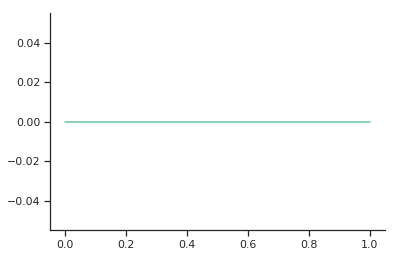

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='ticks', palette='Set2')

params = np.linspace(0, 1, 100)
p_x = [np.product(st.bernoulli.pmf(drunk_t, p)) for p in params]
plt.plot(params, p_x)
sns.despine()

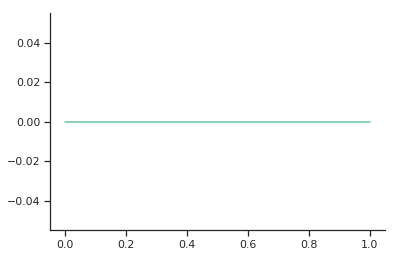

In [56]:
# Prior distribution
p_drunk = drunk = np.random.binomial(n=1, p=.5, size=1000)
p_p_drunk = np.array([np.product(st.bernoulli.pmf(p_drunk, p)) for p in params])
plt.plot(params, p_p_drunk)
sns.despine()

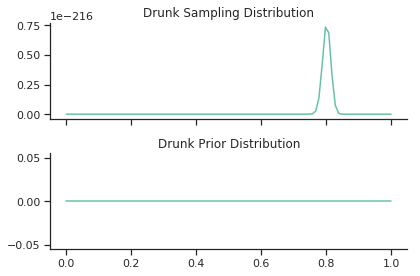

In [57]:
drunk_n = drunk = np.random.binomial(n=1, p=.8, size=1000)
p_drunk_n = np.array([np.product(st.bernoulli.pmf(drunk_n, p)) for p in params])
fig, axes = plt.subplots(2, 1, sharex=True)
axes[0].plot(params, p_drunk_n)
axes[0].set_title("Drunk Sampling Distribution")
axes[1].plot(params, p_p_drunk)
axes[1].set_title("Drunk Prior Distribution")
sns.despine()
plt.tight_layout()

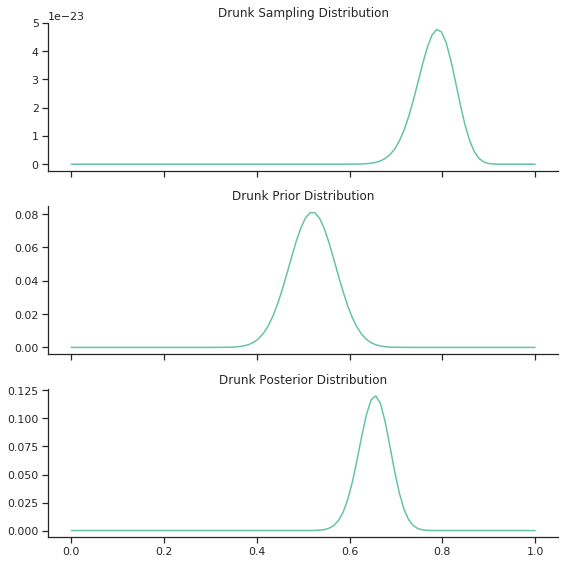

In [64]:
def prob_drunk_given_positive(n_params=100, n_sample=100, true_p=.8, prior_p=.5, n_prior=100):
    params = np.linspace(0, 1, n_params)
    sample = np.random.binomial(n=1, p=true_p, size=n_sample)
    likelihood = np.array([np.product(st.bernoulli.pmf(sample, p)) for p in params])
    #likelihood = likelihood / np.sum(likelihood)
    prior_sample = np.random.binomial(n=1, p=prior_p, size=n_prior)
    prior = np.array([np.product(st.bernoulli.pmf(prior_sample, p)) for p in params])
    prior = prior / np.sum(prior)
    posterior = [prior[i] * likelihood[i] for i in range(prior.shape[0])]
    posterior = posterior / np.sum(posterior)
     
    fig, axes = plt.subplots(3, 1, sharex=True, figsize=(8,8))
    axes[0].plot(params, likelihood)
    axes[0].set_title("Drunk Sampling Distribution")
    axes[1].plot(params, prior)
    axes[1].set_title("Drunk Prior Distribution")
    axes[2].plot(params, posterior)
    axes[2].set_title("Drunk Posterior Distribution")
    sns.despine()
    plt.tight_layout()
     
    return posterior
  
example_post = prob_drunk_given_positive()

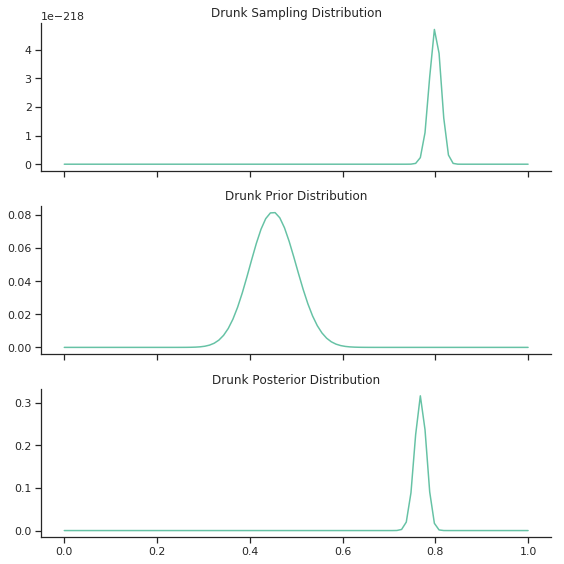

In [65]:
moredata_post = prob_drunk_given_positive(n_sample=1000)

### Part 2. Explore `scipy.stats.bayes_mvs` - read its documentation, and experiment with it on data you've tested in other ways earlier this week

#### scipy.stats.bayes_mvs

scipy.stats.bayes_mvs(data, alpha=0.9) (Bayesian confidence intervals for the mean, var, and std.)

**Parameters**
- **data**: array_like (Input data, if multi-dimensional it is flattened to 1-D by bayes_mvs. Requires 2 or more data points.)
- **alpha**: float, optional (Probability that the returned confidence interval contains the true parameter.)

**Returns**
- **mean_cntr**, **var_cntr**, **std_cntrtuple** (The three results are for the mean, variance and standard deviation, respectively. Each result is a tuple of the form:)
-(center, (lower, upper)) (with center the mean of the conditional pdf of the value given the data, and (lower, upper) a confidence interval, centered on the median, containing the estimate to a probability alpha.)



#### Bring in dataset from assignment 2

In [0]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', header=None)

In [0]:
df =df.replace('?', None)
df[11][0]='n'

In [69]:
# Change n/y to binary
df =df.replace('y', 1)
df = df.replace('n', 0)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,republican,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
2,democrat,0,1,1,1,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1


In [70]:
df.columns = ['class', 'infants', 'water_cost', 'budget', 'fee_freeze', 'aid_elsalvador', 'rel_school', 'satellite', 'aid_contras', 'mx_missle', 'immigration', 'cutback', 'education', 'right_to_sue', 'crime', 'duty_free_ex', 'export_south_africa']
df.head()

,class,infants,water_cost,budget,fee_freeze,aid_elsalvador,rel_school,satellite,aid_contras,mx_missle,immigration,cutback,education,right_to_sue,crime,duty_free_ex,export_south_africa
0,republican,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
1,republican,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
2,democrat,0,1,1,1,1,1,0,0,0,0,1,0,1,1,0,0
3,democrat,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0,1
4,democrat,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1


In [0]:
df_republican = df[df['class']== 'republican']

In [0]:
df_democrat = df[df['class']== 'democrat']

In [0]:
from scipy import stats
def confidence_interval(data, confidence=0.95):
  """
  Calculate a confidence interval around a sample mean for given data.
  Using t-distribution and two-tailed test, default 95% confidence. 
  
  Arguments:
    data - iterable (list or numpy array) of sample observations
    confidence - level of confidence for the interval
  
  Returns:
    tuple of (mean, lower bound, upper bound)
  """
  data = np.array(data)
  mean = np.mean(data)
  n = len(data)
  stderr = stats.sem(data)
  interval = stderr * stats.t.ppf((1 + confidence) / 2.0, n - 1)
  return (mean, mean - interval, mean + interval)

In [0]:
dem_infants= df_democrat['infants']

In [75]:
sample_size = 100
sample = dem_infants.sample(sample_size)
sample.head()

47     1
362    1
184    0
16     1
397    1
Name: infants, dtype: int64

In [76]:
sample_mean = sample.mean()
sample_std = np.std(sample, ddof=1)
print(sample_mean, sample_std)

0.57 0.49756985195624276


In [77]:
standard_error = sample_std/np.sqrt(sample_size)
standard_error

0.04975698519562428

In [78]:
t = 1.84
(sample_mean, sample_mean - t*standard_error, sample_mean + t*standard_error)

(0.57, 0.4784471472400513, 0.6615528527599486)

In [79]:
confidence_interval(sample, confidence=0.95)

(0.57, 0.47127134651887564, 0.6687286534811243)

In [80]:
confidence_interval(dem_infants,confidence=0.95 )

(0.599250936329588, 0.5400909065910334, 0.6584109660681426)

In [0]:
mean1_conf_inter = confidence_interval(dem_infants, confidence=0.95)

#### Do bayesian this time

In [0]:
mean_conf_inter,_,_ = stats.bayes_mvs(dem_infants, alpha=0.9)

In [83]:
mean_conf_inter

Mean(statistic=0.599250936329588, minmax=(0.549655442170897, 0.6488464304882791))

### Part 3. Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach

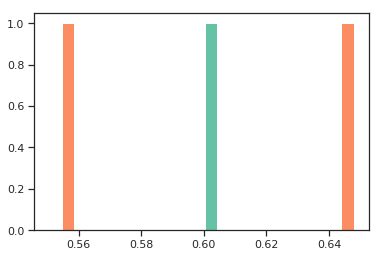

In [89]:
# Bayesian approach
plt.hist(mean_conf_inter);

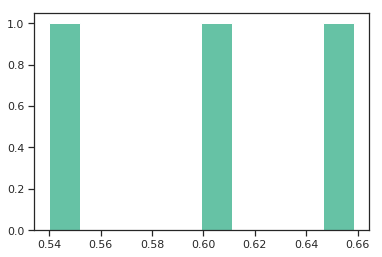

In [92]:
# Frequentist approach
plt.hist(mean1_conf_inter);

### Part 4. In your own words, summarize the difference between Bayesian and Frequentist statistics

In [0]:
# Frequentist will do repeated experiments a large number of times to come to an answer where a Bayesian will use probability but will update it each time they gain more information before coming to an answer

## Resources

- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)